# Assignment 1 - INF367

In [769]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator, QasmSimulator
from qiskit.visualization import array_to_latex, plot_histogram
import numpy as np
import qiskit.quantum_info as qi
from qiskit.quantum_info import Statevector, Operator
import math
# To be used for measurments

backend = QasmSimulator()
def measure(qc: QuantumCircuit, shots=1000):
    qc.measure_all()
    transpiled_qc = transpile(qc, backend)
    job = backend.run(transpiled_qc, shots=shots)
    result = job.result()
    return result.get_counts()

### 1.1 Playing with Quantum Circuits

1. Implement circuit to produce  |ψ⟩ = 1√2 ( |RRLL⟩ − |LLRR⟩ )

In [770]:
qc = QuantumCircuit(4)

qc.h(3)
qc.h(2)
qc.h(1)
qc.h(0)
qc.u(np.pi*2.5, np.pi*2, np.pi*2,1)

qc.cx(0,1)

qc.cx(2,1)

qc.cx(3,0)

qc.z(0)

qc.z(1)

qc.cz(2,0)

qc.cz(3,1)

statevector = Statevector(qc)
x = Operator(qc).to_matrix()

display(statevector.draw('latex'))
display(qc.draw(reverse_bits=True))
display(array_to_latex(x))


<IPython.core.display.Latex object>

┌───┐                                           
q_3: ┤ H ├─────────────────────────────■───────────■─
     ├───┤                             │           │ 
q_2: ┤ H ├────────────────────────■────┼────────■──┼─
     ├───┤┌───────────────┐┌───┐┌─┴─┐  │  ┌───┐ │  │ 
q_1: ┤ H ├┤ U(5π/2,2π,2π) ├┤ X ├┤ X ├──┼──┤ Z ├─┼──■─
     ├───┤└───────────────┘└─┬─┘└───┘┌─┴─┐├───┤ │    
q_0: ┤ H ├───────────────────■───────┤ X ├┤ Z ├─■────
     └───┘                           └───┘└───┘

<IPython.core.display.Latex object>

2. Full standard measurment

In [771]:
res = measure(qc, shots=1000)


Circuit:


┌───┐                                            ░          ┌─┐
   q_3: ┤ H ├─────────────────────────────■───────────■──░──────────┤M├
        ├───┤                             │           │  ░       ┌─┐└╥┘
   q_2: ┤ H ├────────────────────────■────┼────────■──┼──░───────┤M├─╫─
        ├───┤┌───────────────┐┌───┐┌─┴─┐  │  ┌───┐ │  │  ░    ┌─┐└╥┘ ║ 
   q_1: ┤ H ├┤ U(5π/2,2π,2π) ├┤ X ├┤ X ├──┼──┤ Z ├─┼──■──░────┤M├─╫──╫─
        ├───┤└───────────────┘└─┬─┘└───┘┌─┴─┐├───┤ │     ░ ┌─┐└╥┘ ║  ║ 
   q_0: ┤ H ├───────────────────■───────┤ X ├┤ Z ├─■─────░─┤M├─╫──╫──╫─
        └───┘                           └───┘└───┘       ░ └╥┘ ║  ║  ║ 
meas: 4/════════════════════════════════════════════════════╩══╩══╩══╩═
                                                            0  1  2  3

Result: {'1101': 127, '0100': 124, '0001': 128, '1110': 130, '0111': 113, '1011': 138, '0010': 128, '1000': 112}

Histogram:


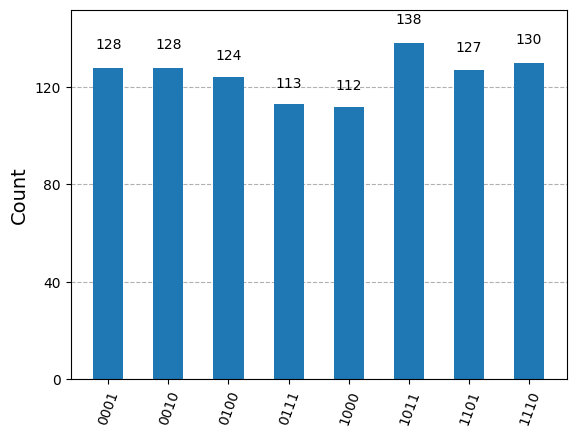

In [772]:
print('Circuit:')
display(qc.draw(reverse_bits=True))

print('Result:',res,end='\n\n')

print('Histogram:')
plot_histogram(res)

3. Inverese circuit

In [773]:
# Original circuit

qc = QuantumCircuit(4)

qc.h(3)
qc.h(2)
qc.h(1)
qc.h(0)
qc.u(np.pi*2.5, np.pi*2, np.pi*2,1)
qc.cx(0,1)
qc.cx(2,1)
qc.cx(3,0)
qc.z(0)
qc.z(1)
qc.cz(2,0)
qc.cz(3,1)

qc.barrier()

# Inversing the circuit

qc.cz(3,1)
qc.cz(2,0)
qc.z(1)
qc.z(0)
qc.cx(3,0)
qc.cx(2,1)
qc.cx(0,1)

qc.u(-1*np.pi*2.5, -1*np.pi*2, -1*np.pi*2, 1)
 
qc.barrier()
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)

statevector = Statevector(qc)
x_inverse = Operator(qc).to_matrix()

print('Statevector:')
display(statevector.draw('latex'))

print('Circuit:')
display(qc.draw(reverse_bits=True, plot_barriers=False))

print('Output matrix:')
display(array_to_latex(x_inverse))


Statevector:


<IPython.core.display.Latex object>

Circuit:


┌───┐                                                                 »
q_3: ┤ H ├─────────────────────────────■───────────■───■───────────■───────»
     ├───┤                             │           │   │           │       »
q_2: ┤ H ├────────────────────────■────┼────────■──┼───┼──■────────┼────■──»
     ├───┤┌───────────────┐┌───┐┌─┴─┐  │  ┌───┐ │  │   │  │ ┌───┐  │  ┌─┴─┐»
q_1: ┤ H ├┤ U(5π/2,2π,2π) ├┤ X ├┤ X ├──┼──┤ Z ├─┼──■───■──┼─┤ Z ├──┼──┤ X ├»
     ├───┤└───────────────┘└─┬─┘└───┘┌─┴─┐├───┤ │         │ ├───┤┌─┴─┐└───┘»
q_0: ┤ H ├───────────────────■───────┤ X ├┤ Z ├─■─────────■─┤ Z ├┤ X ├─────»
     └───┘                           └───┘└───┘             └───┘└───┘     »
«                               ┌───┐
«q_3: ──────────────────────────┤ H ├
«                               ├───┤
«q_2: ──────────────────────────┤ H ├
«     ┌───┐┌──────────────────┐ ├───┤
«q_1: ┤ X ├┤ U(-5π/2,-2π,-2π) ├─┤ H ├
«     └─┬─┘└──────────────────┘ ├───┤
«q_0: ──■───────────────────────┤ H ├
«                               └───┘

Output matrix:


<IPython.core.display.Latex object>

We flipped the order of the gates, and found that the U-gate had to be inversed. We looked at the conjugated and transformed version of the matrix concluding that $\phi$ and $\lambda$ had to be negative and change place. Due to the negativity of sin when flipping the matrix, $\theta$ had to be negative. Having a negative $\theta$ would not affect the value of cos.

We also found that qiskit had a method for inversing a circuit, and we used this to doublecheck our result.

In [774]:
qc = QuantumCircuit(4)

qc.h(3)
qc.h(2)
qc.h(1)
qc.h(0)
qc.barrier()
qc.u(np.pi*2.5, np.pi*2, np.pi*2,1)

qc.cx(0,1)
qc.cx(2,1)
qc.cx(3,0)
qc.z(0)
qc.z(1)
qc.cz(2,0)
qc.cz(3,1)



qx = qc.inverse()
print("Inversed circuit using qiskit's method:")
qx.draw(reverse_bits=True)

Inversed circuit using qiskit's method:


░ ┌───┐
q_3: ─■───────────■─────────────────────────────────░─┤ H ├
      │           │                                 ░ ├───┤
q_2: ─┼──■────────┼────■────────────────────────────░─┤ H ├
      │  │ ┌───┐  │  ┌─┴─┐┌───┐┌──────────────────┐ ░ ├───┤
q_1: ─■──┼─┤ Z ├──┼──┤ X ├┤ X ├┤ U(-5π/2,-2π,-2π) ├─░─┤ H ├
         │ ├───┤┌─┴─┐└───┘└─┬─┘└──────────────────┘ ░ ├───┤
q_0: ────■─┤ Z ├┤ X ├───────■───────────────────────░─┤ H ├
           └───┘└───┘                               ░ └───┘

### 1.2 Quantum State Tomography

1. Implementing circuit in Qiskit

In [775]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.tdg(0)
qc.z(0)
qc.y(0)
qc.rx(theta=1.6,qubit=0)
qc.s(0)
print('Circuit:')
display(qc.draw(reverse_bits=True))

Circuit:


┌───┐┌───┐┌─────┐┌───┐┌───┐┌─────────┐┌───┐
q: ┤ X ├┤ H ├┤ Tdg ├┤ Z ├┤ Y ├┤ Rx(1.6) ├┤ S ├
   └───┘└───┘└─────┘└───┘└───┘└─────────┘└───┘

2. Retrieve statevector

In [776]:
statevector = Statevector(qc)
print('Statevector:')
display(statevector.draw('latex'))

Statevector:


<IPython.core.display.Latex object>

3. Apply measurements

In [777]:
# Created function as we will use the same circuit many times

def create_circuit():
    qc = QuantumCircuit(1,1)
    qc.x(0)
    qc.h(0)
    qc.tdg(0)
    qc.z(0)
    qc.y(0)
    qc.rx(theta=1.6,qubit=0)
    qc.s(0)

    return qc

Z-basis (0,1)

In [778]:
z_basis = create_circuit() # z-basis is the standard basis
z_basis.measure(0,0)
print('Circuit:')
display(z_basis.draw(reverse_bits=True))

statevector = Statevector(qc)
print('Statevector:')
display(statevector.draw('latex'))
backend = AerSimulator()
job = backend.run(z_basis, shots=1000)
z_basis_results= job.result().get_counts()
print(z_basis_results)

Circuit:


┌───┐┌───┐┌─────┐┌───┐┌───┐┌─────────┐┌───┐┌─┐
  q: ┤ X ├┤ H ├┤ Tdg ├┤ Z ├┤ Y ├┤ Rx(1.6) ├┤ S ├┤M├
     └───┘└───┘└─────┘└───┘└───┘└─────────┘└───┘└╥┘
c: 1/════════════════════════════════════════════╩═
                                                 0

Statevector:


<IPython.core.display.Latex object>

{'1': 847, '0': 153}


X-basis (+,-)

Statevector:


<IPython.core.display.Latex object>

Output matrix:


<IPython.core.display.Latex object>

Circuit:


┌───┐┌───┐┌─────┐┌───┐┌───┐┌─────────┐┌───┐┌─┐
  q: ┤ X ├┤ H ├┤ Tdg ├┤ Z ├┤ Y ├┤ Rx(1.6) ├┤ S ├┤M├
     └───┘└───┘└─────┘└───┘└───┘└─────────┘└───┘└╥┘
c: 1/════════════════════════════════════════════╩═
                                                 0

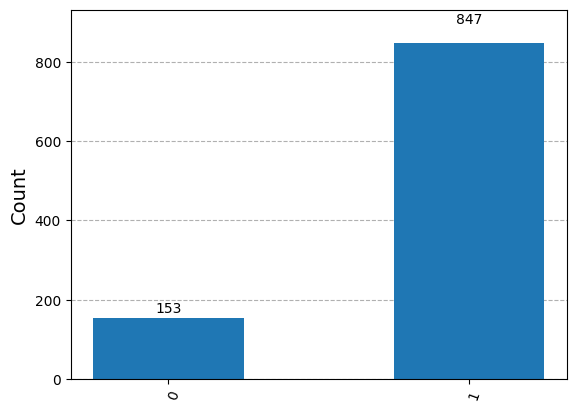

In [779]:
z_basis = create_circuit() # z-basis is the standard basis

print('Statevector:')
statevector = Statevector(z_basis)
display(statevector.draw('latex'))

print('Output matrix:')
matrix = Operator(z_basis).to_matrix()
display(array_to_latex(matrix))

z_basis.measure(0,0)
print('Circuit:')
display(z_basis.draw(reverse_bits=True))

plot_histogram(job.result().get_counts())

Measuring in the X-basis (+,-)

Statevector:


<IPython.core.display.Latex object>

Circuit:


┌───┐┌───┐┌─────┐┌───┐┌───┐┌─────────┐┌───┐┌───┐┌─┐
  q: ┤ X ├┤ H ├┤ Tdg ├┤ Z ├┤ Y ├┤ Rx(1.6) ├┤ S ├┤ H ├┤M├
     └───┘└───┘└─────┘└───┘└───┘└─────────┘└───┘└───┘└╥┘
c: 1/═════════════════════════════════════════════════╩═
                                                      0

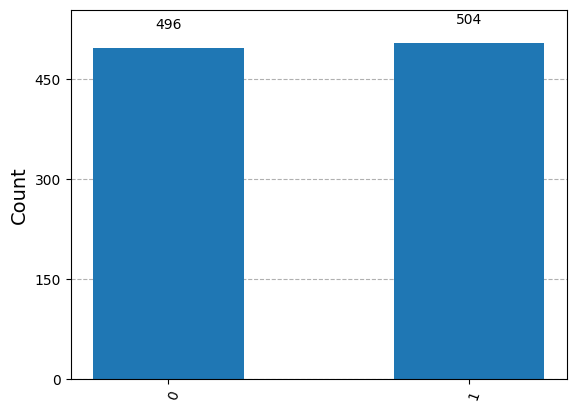

In [781]:
x_basis = create_circuit() 

x_basis.h(0) # change from standard basis to x-basis
print('Statevector:')
statevector = Statevector(x_basis)
display(statevector.draw('latex'))

x_basis.measure(0,0)
print('Circuit:')
display(x_basis.draw(reverse_bits=True))

backend = AerSimulator()
job = backend.run(x_basis, shots=1000)
x_basis_results= job.result().get_counts()
plot_histogram(job.result().get_counts())

Measuring in the Y-basis (R,L)

In [783]:
y_basis = create_circuit()
y_basis.sdg(0) # turn from standard basis to y-basis
y_basis.h(0)
y_basis.measure(0,0)
print('Circuit:')
display(y_basis.draw(reverse_bits=True))
backend = AerSimulator()
job = backend.run(y_basis, shots=1000)
y_basis_results= job.result().get_counts()
print(y_basis_results)

Circuit:


┌───┐┌───┐┌─────┐┌───┐┌───┐┌─────────┐┌───┐┌─────┐┌───┐┌─┐
  q: ┤ X ├┤ H ├┤ Tdg ├┤ Z ├┤ Y ├┤ Rx(1.6) ├┤ S ├┤ Sdg ├┤ H ├┤M├
     └───┘└───┘└─────┘└───┘└───┘└─────────┘└───┘└─────┘└───┘└╥┘
c: 1/════════════════════════════════════════════════════════╩═
                                                             0

{'1': 858, '0': 142}


In [784]:
print('Statevector:')
display(statevector.draw('latex'))
#qc.
res = measure(qc, shots=1000)


Statevector:


<IPython.core.display.Latex object>

Circuit:


┌───┐┌───┐┌─────┐┌───┐┌───┐┌─────────┐┌───┐┌─────┐┌───┐┌─┐┌───┐┌─┐
  q: ┤ X ├┤ H ├┤ Tdg ├┤ Z ├┤ Y ├┤ Rx(1.6) ├┤ S ├┤ Sdg ├┤ H ├┤M├┤ S ├┤M├
     └───┘└───┘└─────┘└───┘└───┘└─────────┘└───┘└─────┘└───┘└╥┘└───┘└╥┘
c: 1/════════════════════════════════════════════════════════╩═══════╩═
                                                             0       0

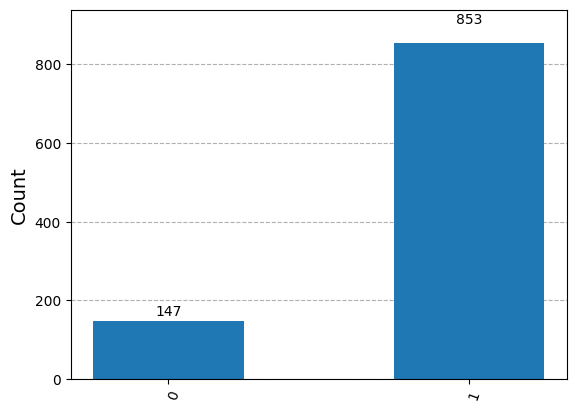

In [785]:


y_basis.s(0) # # change from standard basis to y-basis
y_basis.measure(0,0)
print('Circuit:')
display(y_basis.draw(reverse_bits=True))

backend = AerSimulator()
job = backend.run(y_basis, shots=1000)
plot_histogram(job.result().get_counts())

4. Reconstruct state from measurments

In [798]:
#|+> H   =  |0>
# |R> sdg H = |0>
def reconstruct_state(x_basis_counts,y_basis_counts,z_basis_counts,shots=1000):

    r=math.sqrt(z_basis_counts["0"]/shots) 
    s=math.sqrt(z_basis_counts["1"]/shots)

    r=round(r,2)
    s=round(s,2)

    a=(2*(x_basis_counts["0"]-x_basis_counts["1"])/shots)/(4*r*s)
    b= ((2*(y_basis_counts["0"]-y_basis_counts["1"])/shots)) / (4*r*s)

    a=round(a,4)
    b=round(b,4)

    first_alpha= [math.acos(a),2*math.pi-math.acos(a)]
    second_alpha= [math.asin(b),math.pi -math.asin(b)]

    print(first_alpha,second_alpha)
    first_alpha=[round(i,1) for i in first_alpha]
    second_alpha=[round(i,1) for i in second_alpha]
    dist=[]
    for i in first_alpha:
        for o in second_alpha:
            dist.append((abs(i-o),i))
    dist.sort()
    alpha=dist[0][1]
    print(f"r:{r}, s: {s}, a: {a}, b:{b}")
    print(first_alpha,second_alpha)
    
    print(f"alpha: {alpha}")
    vector1= np.array([[r],[0]])
    vector2= (s*np.exp([complex(real=0,imag=alpha)])) * np.array([[0],[1]])
    
    vector=vector1+vector2
    print(vector)
    print(z_basis_results)
    print(y_basis_results)
    print(x_basis_results)

#reconstruct_state(x_basis_counts={"1":500,"0":500},y_basis_counts={"1":850,"0":150},z_basis_counts={"1":850,"0":150},shots=1000)
reconstruct_state(x_basis_counts=x_basis_results,z_basis_counts=z_basis_results,y_basis_counts=y_basis_results)

[1.5818965547460355, 4.701288752433551] [-1.504451664006606, 4.646044317596399]
r:0.39, s: 0.92, a: -0.0111, b:-0.9978
[1.6, 4.7] [-1.5, 4.6]
alpha: 4.7
[[ 0.39      +0.j       ]
 [-0.01139757-0.9199294j]]
{'1': 847, '0': 153}
{'1': 858, '0': 142}
{'0': 496, '1': 504}
